# Model of Antibiotic Susceptibility and Resistance

In [1]:
%matplotlib agg 
from pprint import pprint

## Simplified Model of &beta;-lactam Diffusion, Efflux, and Hydrolysis

### Hydrolysis Process

In [2]:
from ecoli.processes.antibiotics import antibiotic_hydrolysis

The antibiotic hydrolysis process describes the following reaction:

$$ S \leftrightharpoons S_H $$

Let's assume that this follows Michaelis-Menten Kinetics:

$$ v = \frac{k_{cat}[E][S]}{K_M + [S]} $$

By default, we have the following values:

* $K_M = 1 \times 10^{-3}$ mM
* $[E] = 1 \times 10^{-3}$ mM (this is constant)
* $[S]_0 = 1 \times 10^{-3}$ mM
* $k_{cat} = 1$ $s^{-1}$
* $[S_H]_0 = 0$ mM

In [3]:
pprint({
    key: val
    for key, val in antibiotic_hydrolysis.AntibioticHydrolysis.defaults.items()
    if key in ('Km', 'initial_catalyst', 'initial_target_internal', 'kcat')
})

{'Km': <Quantity(0.001, 'millimole / liter')>,
 'initial_catalyst': 0.001,
 'initial_target_internal': 0.001,
 'kcat': <Quantity(1, '1 / second')>}


If we simulate the process for 10 seconds, we get behavior that looks about right:


Simulation ID: 707d027a-2933-11ec-81d3-94f6d615b5b6
Created: 10/09/2021 at 15:02:24
Completed in 0.003414 seconds


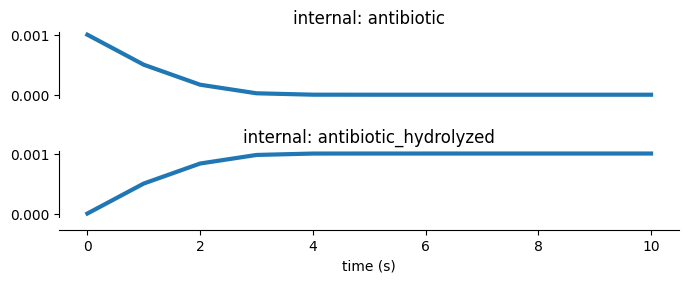

In [4]:
hydrolysis_demo_fig, hydrolysis_demo_data = antibiotic_hydrolysis.demo()
hydrolysis_demo_fig

We can compare the simulated results to what we get from doing the Michaelis-Menten calculations directly:

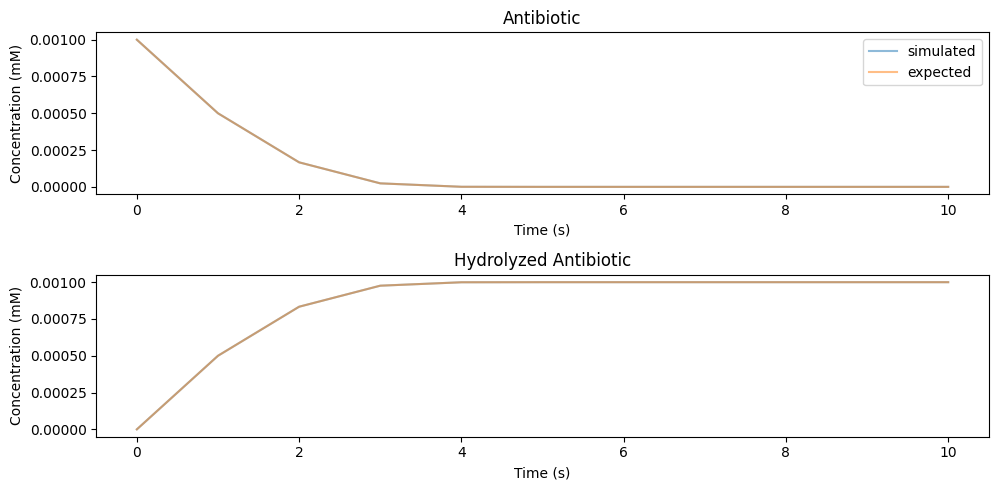

In [5]:
hydrolysis_expected = antibiotic_hydrolysis.get_expected_demo_data()
antibiotic_hydrolysis.get_demo_vs_expected_plot(hydrolysis_demo_data, hydrolysis_expected)

There is very good agreement between the simulated and expected timeseries.

### Efflux Process

In [6]:
from ecoli.processes.antibiotics import antibiotic_transport

The antibiotic hydrolysis process describes the following reaction:

$$ S_I \leftrightharpoons S_E $$

Let's assume that this follows Michaelis-Menten kinetics:

$$ v = \frac{k_{cat}[E][S_I]}{K_M + [S_I]} $$

By default, we have the following values:

* $K_M = 1 \times 10^{-3}$ mM
* $[E] = 1 \times 10^{-3}$ mM (this is constant)
* $[S_I]_0 = 1 \times 10^{-3}$ mM
* $[S_E]_0 = 0$ mM
* $k_{cat} = 1$ $s^{-1}$

In [7]:
pprint({
    key: val
    for key, val in antibiotic_transport.AntibioticTransport.defaults.items()
    if key in ('Km', 'initial_pump', 'initial_internal_antibiotic', 'kcat', 'initial_external_antibiotic')
})

{'Km': <Quantity(0.001, 'millimole / liter')>,
 'initial_external_antibiotic': 0,
 'initial_internal_antibiotic': 0.001,
 'initial_pump': 0.001,
 'kcat': <Quantity(1, '1 / second')>}


If we simulate the process for 10 seconds, we get behavior that looks about right:


Simulation ID: 714d485e-2933-11ec-81d3-94f6d615b5b6
Created: 10/09/2021 at 15:02:26
Completed in 0.009620 seconds


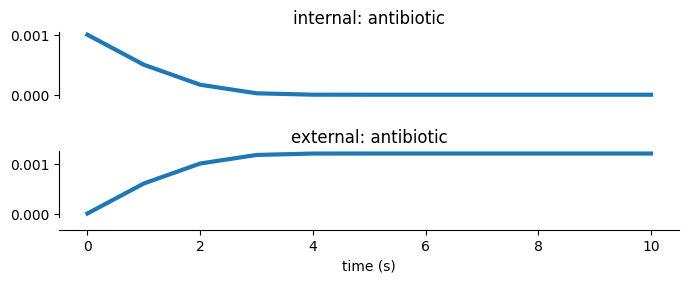

In [8]:
efflux_demo_fig, efflux_demo_data = antibiotic_transport.demo()
efflux_demo_fig

Note that there is an extra step for exported molecules. The efflux process writes the number of molecules to export to the `exchanges` store, and then a second process, `NonSpatialEnvironment`, updates the fields and the transport process's `external` store based on those exchanges. To avoid the 1-timestep lag that this extra step would normally introduce, we make `NonSpatialEnvironment` a `Deriver`.

Here we are using a cell volume of 1.2 fL and an environment volume of 1 fL.

We can compare the simulated results to what we get from doing the Michaelis-Menten calculations directly:

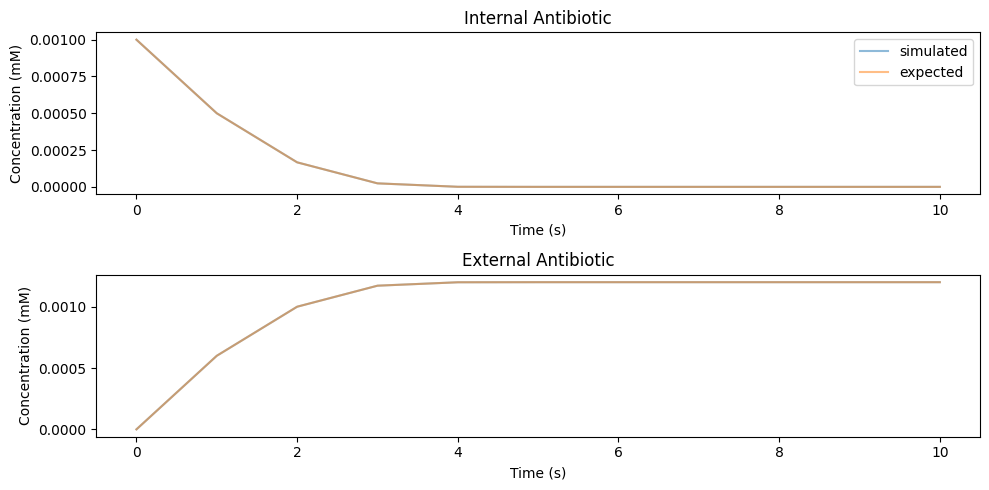

In [9]:
efflux_expected = antibiotic_transport.get_expected_demo_data()
antibiotic_transport.get_demo_vs_expected_plot(efflux_demo_data, efflux_expected)

There is very good agreement between the simulated and expected timeseries.

### Diffusion Process

In [10]:
from ecoli.processes.antibiotics import fickian_diffusion

The diffusion process describes the following reaction:

$$ S_E \leftrightharpoons S_I $$

Let's assume that this follows Fickian diffusion:

$$ rate_{mol} = P \cdot A \cdot m ([S_I] - [S_E]) \Delta t $$

Notice that $rate_{mol}$ has units of moles/sec and is positive when the net flux is out of the cell.

By default, we have the following values:

* $P = 1 \times 10^{-5}$ cm/sec
* $A = 132$ $\frac{cm^2}{mg}$
* $[S_I]_0 = 0$ mM
* $[S_E]_0 = 1 \times 10^{-3}$ mM
* $m = 300$ fg (this is constant)

This equation and $A$ come from:

> Nagano, K., & Nikaido, H. (2009). Kinetic Behavior of the Major Multidrug Efflux Pump AcrB of Escherichia coli. Proceedings of the National Academy of Sciences, 106(14), 5854–5858. https://doi.org/10.1073/pnas.0901695106

The permeability was chosen to make the half-equilibration time 1-10 seconds based on Figure 1 in:

> Nikaido, H. (1989). Outer membrane barrier as a mechanism of antimicrobial resistance. Antimicrobial Agents and Chemotherapy, 33(11), 1831–1836. https://doi.org/10.1128/AAC.33.11.1831

In [11]:
pprint({
    key: val
    for key, val in fickian_diffusion.FickianDiffusion.defaults.items()
    if key in ('permeability', 'surface_area_mass_ratio', 'initial_state',)
})

{'initial_state': {'external': {'antibiotic': 0.001},
                   'global': {'dry_mass': <Quantity(300, 'femtogram')>,
                              'volume': <Quantity(1.2, 'femtoliter')>},
                   'internal': {'antibiotic': 0}},
 'permeability': <Quantity(1e-05, 'centimeter / second')>,
 'surface_area_mass_ratio': <Quantity(132.0, 'centimeter ** 2 / milligram')>}


If we simulate the process for 10 seconds, we get behavior that looks about right:


Simulation ID: 71da72ba-2933-11ec-81d3-94f6d615b5b6
Created: 10/09/2021 at 15:02:27
Completed in 0.016094 seconds


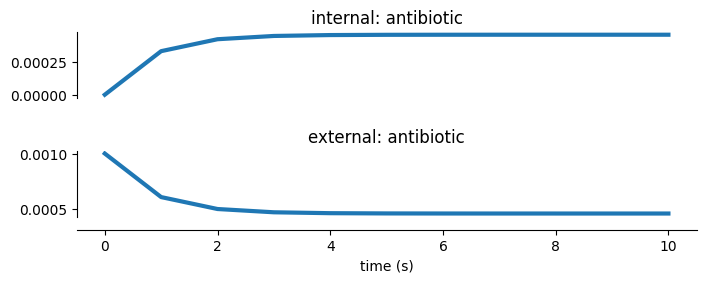

In [12]:
diffusion_demo_fig, diffusion_demo_data = fickian_diffusion.demo()
diffusion_demo_fig

Note that once again, we are using a `NonSpatialEnvironment` with a cell volume of 1.2 fL and an environment volume of 1 fL.

We can compare the simulated results to what we get from the calculations using Fick's Law directly:

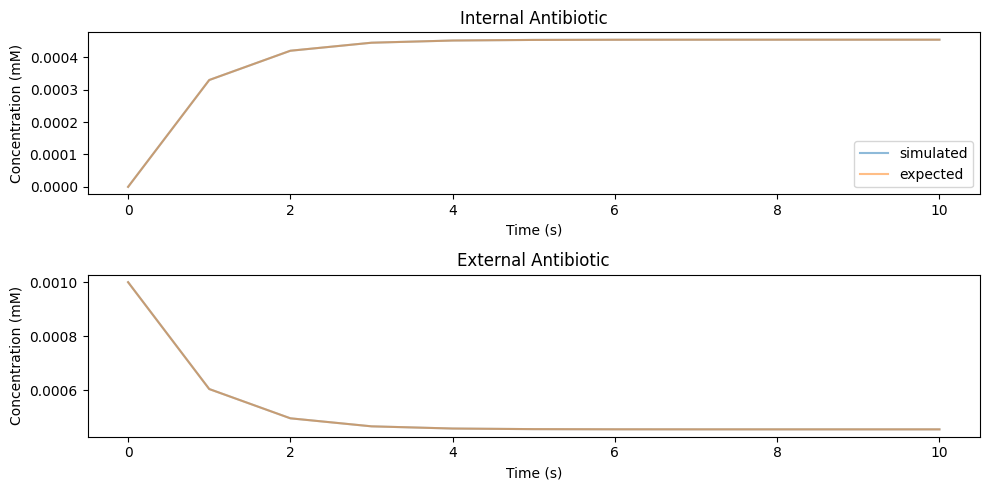

In [13]:
diffusion_expected = fickian_diffusion.get_expected_demo_data()
fickian_diffusion.get_demo_vs_expected_plot(diffusion_demo_data, diffusion_expected)

There is very good agreement between the simulated and expected timeseries. Also notice that the concentrations reach equilibrium at the value we would expect (about $0.5 \times 10^{-3}$ mM because the internal and external volumes are about equal) and do so within 10 seconds, as we expected based on the half-equilibration time.